In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dados2 = pd.read_csv('raw_sales.csv')
dados2.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [13]:
dados2.rename(columns={'datesold':'datesale'}, inplace=True)
dados2.head()

,datesale,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [14]:
dados2['datesale'] = pd.to_datetime(dados2['datesale'])
dados2.head(3)

,datesale,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3


In [18]:
dados2.isnull().sum()
dados2.set_index('datesale', inplace=True)
dados2.head(30)

,postcode,price,propertyType,bedrooms
datesale,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3
2007-04-04,2905,465000,house,4
2007-04-24,2607,399000,house,3
2007-04-30,2606,1530000,house,4
2007-05-24,2902,359000,house,3


In [19]:
dados3 = dados2.resample('M').mean()
dados3.head(20)

,postcode,price,bedrooms
datesale,,,
2007-02-28,2756.500000,407500.000000,3.500000
2007-03-31,2905.333333,339333.333333,3.333333
2007-04-30,2706.000000,798000.000000,3.666667
2007-05-31,2904.000000,339500.000000,3.000000
2007-06-30,2757.500000,520333.333333,3.333333
2007-07-31,2668.684211,592078.947368,3.263158
2007-08-31,2775.869565,505608.695652,3.391304
2007-09-30,2681.950000,556875.000000,3.300000
2007-10-31,2743.500000,498600.000000,3.300000


<AxesSubplot:>

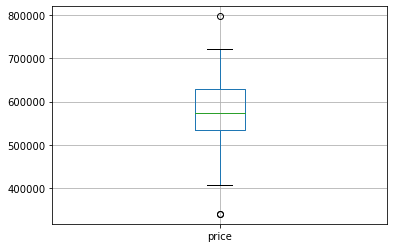

In [20]:
dados3.loc[:,['price']].boxplot()

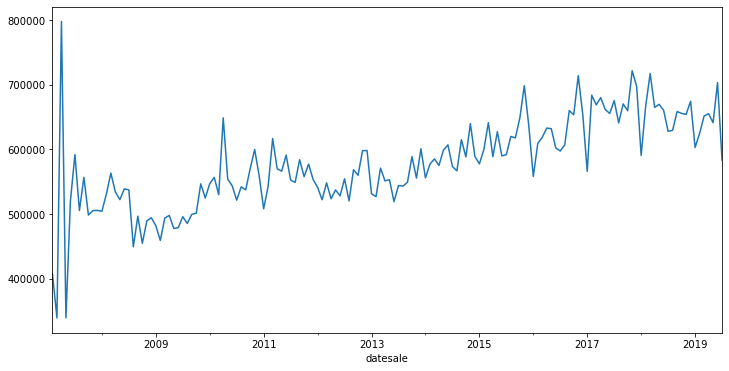

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
dados3['price'].plot()
plt.show()

In [22]:
for n in dados3['price']:
    if n > dados3['price'].mean() + np.std(dados3['price'])*2 or n < dados3['price'].mean() - np.std(dados3['price'])*2:
        dados3[dados3 == n] = dados3['price'].mean()

In [23]:
for n in dados3['price']:
    if n > dados3['price'].mean() + np.std(dados3['price'])*2 or n < dados3['price'].mean() - np.std(dados3['price'])*2:
        print(n)

698680.5721393034


<AxesSubplot:>

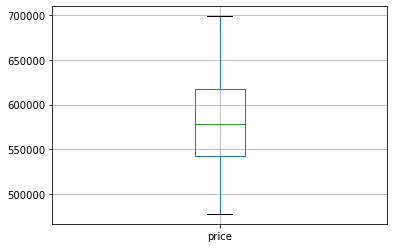

In [24]:
dados3.loc[:,['price']].boxplot()

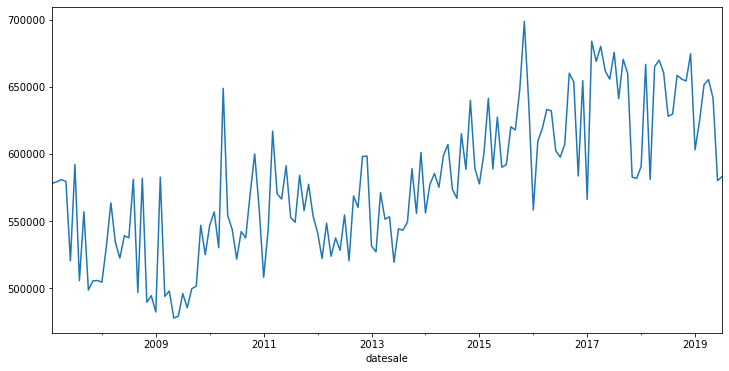

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
dados3['price'].plot()
plt.show()

In [26]:
print("value:", adfuller(dados3['price'])[0],
     "p-value:", adfuller(dados3['price'])[1],
     "conf:", adfuller(dados3['price'])[4])

value: -0.9647364484957975 p-value: 0.7659076765447868 conf: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


In [27]:
dados3 = dados3.diff()
dados3.dropna(inplace=True)
print("value:", adfuller(dados3['price'])[0],
     "p-value:", adfuller(dados3['price'])[1],
     "conf:", adfuller(dados3['price'])[4])

value: -6.1225592346415665 p-value: 8.78379906023806e-08 conf: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


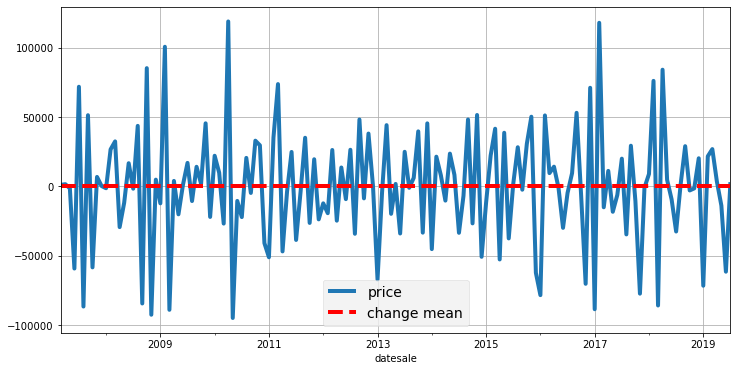

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')
dados3['price'].plot()
plt.axhline(y=dados3['price'].mean(), color='red', ls='--', label='change mean')
plt.legend()
plt.show()

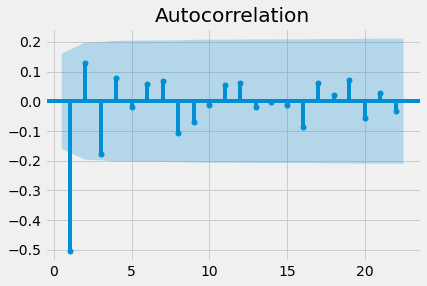

In [29]:
plot_acf(dados3['price'], zero=False)
plt.show()

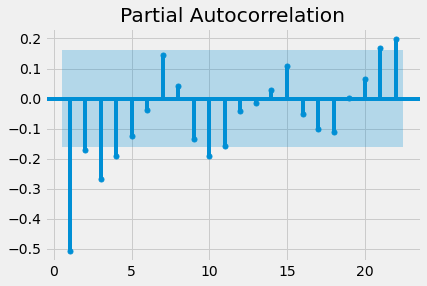

In [30]:
plot_pacf(dados3['price'], zero=False)
plt.show()

In [31]:
modelo = SARIMAX(dados3['price'], order=(0,0,1))
res = modelo.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  149
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1764.134
Date:                Thu, 21 Jul 2022   AIC                           3532.268
Time:                        17:10:15   BIC                           3538.276
Sample:                    03-31-2007   HQIC                          3534.709
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7474      0.060    -12.382      0.000      -0.866      -0.629
sigma2      1.215e+09   6.48e-13   1.88e+21      0.000    1.21e+09    1.21e+09
Ljung-Box (L1) (Q):                   0.03   Jarque-

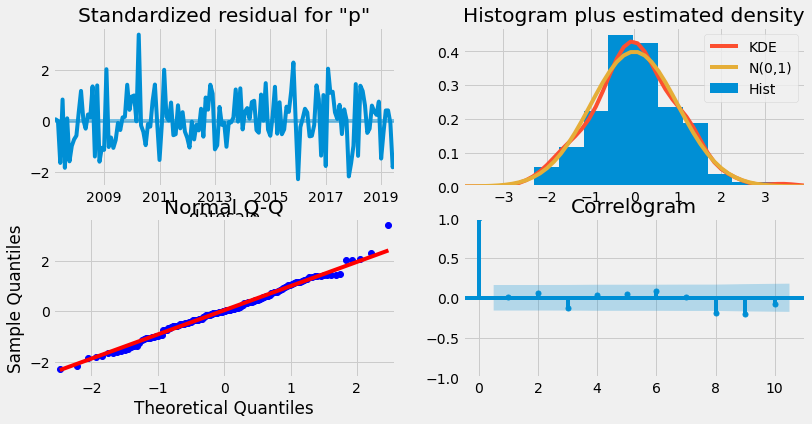

In [32]:
res.plot_diagnostics(figsize=(12,6))
plt.show()

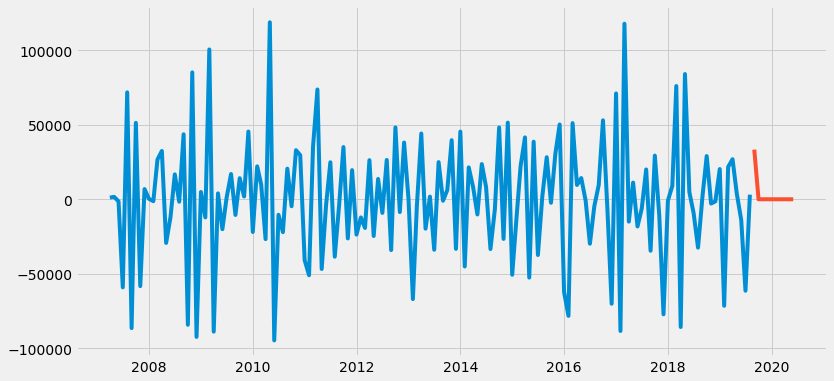

In [33]:
diff_forecast = res.get_forecast(steps=10)
forecast_mean = diff_forecast.predicted_mean

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(dados3['price'])
plt.plot(forecast_mean)
plt.show()